In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import yfinance as yf

#from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
#path equals etc... 

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL", "QQQ", "ARKK"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_portfolio.head()

AAPL                                     ARKK  \
                             open    high     low   close    volume   open   
time                                                                         
2017-05-01 00:00:00-04:00  145.10  147.20  144.96  146.56  25669350  25.48   
2017-05-02 00:00:00-04:00  147.54  148.09  146.84  147.47  31308344  25.91   
2017-05-03 00:00:00-04:00  145.59  147.49  144.27  147.06  38855247  25.75   
2017-05-04 00:00:00-04:00  146.55  147.14  145.81  146.54  18926882  25.74   
2017-05-05 00:00:00-04:00  146.76  148.98  146.76  148.96  22675122  25.77   

                                                                  QQQ          \
                              high      low    close   volume    open    high   
time                                                                            
2017-05-01 00:00:00-04:00  25.7199  25.3504  25.7100  35949.0  135.05  135.96   
2017-05-02 00:00:00-04:00  25.9100  25.5700  25.6699  21238.0  135.90  136.01   
2017-05-03 00:00:00-04:00  25.7700  25.4500  25.6012   7956.0  135.68  135.71   
2017-05-04 00:00:00-04:00  25.7400  25.4019  25.5000  13170.0  135.54  135.96   
2017-05-05 00:00:00-04:00  25.7700  25.5000  25.7600  12850.0  135.92  136.07   

                                                     
                              low   close    volume  
time                                                 
2017-05-01 00:00:00-04:00  134.97  135.73  17204770  
2017-05-02 00:00:00-04:00  135.54  135.96  14449779  
2017-05-03 00:00:00-04:00  135.16  135.53  15918064  
2017-05-04 00:00:00-04:00  135.10  135.57  13641296  
2017-05-05 00:00:00-04:00  135.42  136.07  12108993

In [6]:
#df_portfolio.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
port_data = pd.DataFrame()

for c in df_portfolio.columns:
    if c[1] in "close":
        port_data[c[0]] = df_portfolio[c[0]][c[1]]

In [7]:
#find the daily returns of each stock in the portfolio
port_data= port_data.pct_change()
port_data= port_data.dropna()

port_data.head()

,AAPL,ARKK,QQQ
time,,,
2017-05-02 00:00:00-04:00,0.006209,-0.001560,0.001695
2017-05-03 00:00:00-04:00,-0.002780,-0.002676,-0.003163
2017-05-04 00:00:00-04:00,-0.003536,-0.003953,0.000295
2017-05-05 00:00:00-04:00,0.016514,0.010196,0.003688
2017-05-08 00:00:00-04:00,0.027189,-0.001203,0.002205


In [8]:
#concat the portfolio into total returns
weights=[1/3, 1/3, 1/3]
weighted_return= (weights * port_data)
portfolio_return = weighted_return.sum(axis=1)
portfolio_return.head()
cumprod_port= (1 + portfolio_return).cumprod()
cumprod_port.head()

time
2017-05-02 00:00:00-04:00    1.002115
2017-05-03 00:00:00-04:00    0.999235
2017-05-04 00:00:00-04:00    0.996839
2017-05-05 00:00:00-04:00    1.006940
2017-05-08 00:00:00-04:00    1.016402
dtype: float64

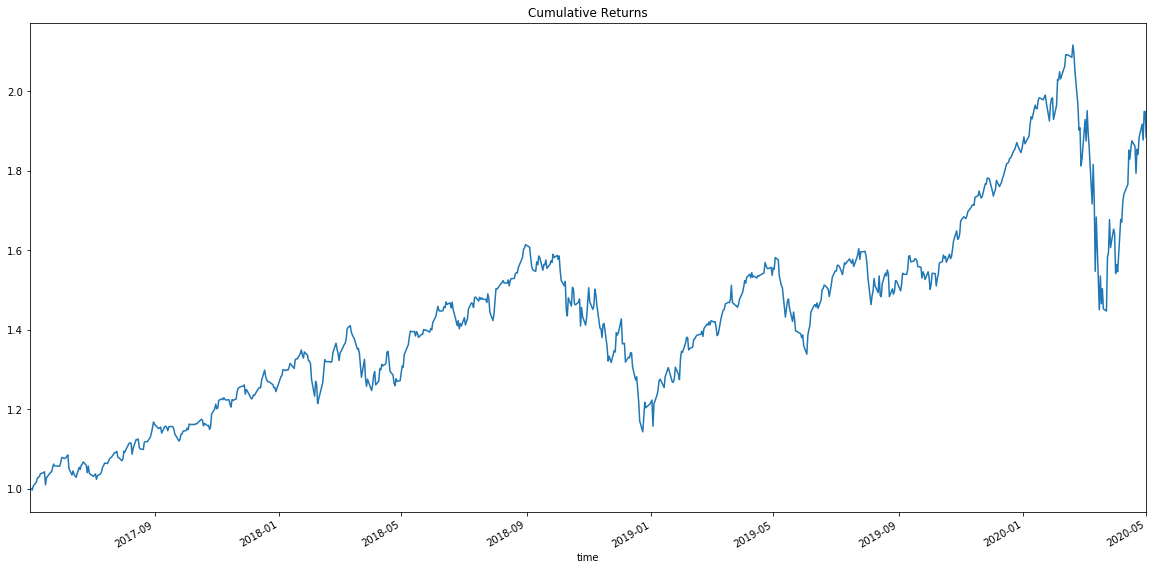

In [9]:
#plot portfolio returns
cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns")

In [10]:
#Add the ETF Data
#correlate to ETF data
#add 11 industry ETFs


In [11]:
#quandl.get_table('SHARADAR/SFP', ticker='AADR')

In [12]:
#pip install yfinance

In [13]:
"""tech_etf = yf.Ticker("XLK")

# get stock info
tech_etf.info

# get historical market data
hist = tech_etf.history(period="max")
hist.to_csv("XLK.csv")
"""

'tech_etf = yf.Ticker("XLK")\n\n# get stock info\ntech_etf.info\n\n# get historical market data\nhist = tech_etf.history(period="max")\nhist.to_csv("XLK.csv")\n'

In [14]:
#hist.to_csv("XLK.csv")

In [15]:
"""health_etf = yf.Ticker("XLV")

# get stock info
health_etf.info

# get historical market data
hist = health_etf.history(period="max")
hist.to_csv("XLV.csv")
"""

'health_etf = yf.Ticker("XLV")\n\n# get stock info\nhealth_etf.info\n\n# get historical market data\nhist = health_etf.history(period="max")\nhist.to_csv("XLV.csv")\n'

In [16]:
"""
financial_etf = yf.Ticker("XLF")

# get stock info
financial_etf.info

# get historical market data
hist = financial_etf.history(period="max")
hist.to_csv("XLF.csv")
"""

'\nfinancial_etf = yf.Ticker("XLF")\n\n# get stock info\nfinancial_etf.info\n\n# get historical market data\nhist = financial_etf.history(period="max")\nhist.to_csv("XLF.csv")\n'

In [17]:
"""
real_estate_etf = yf.Ticker("XLRE")

# get stock info
real_estate_etf.info

# get historical market data
hist = real_estate_etf.history(period="max")
hist.to_csv("XLRE.csv")
"""


'\nreal_estate_etf = yf.Ticker("XLRE")\n\n# get stock info\nreal_estate_etf.info\n\n# get historical market data\nhist = real_estate_etf.history(period="max")\nhist.to_csv("XLRE.csv")\n'

In [18]:
"""
energy_etf = yf.Ticker("XLE")

# get stock info
energy_etf.info

# get historical market data
hist = energy_etf.history(period="max")
hist.to_csv("XLE.csv")
"""

'\nenergy_etf = yf.Ticker("XLE")\n\n# get stock info\nenergy_etf.info\n\n# get historical market data\nhist = energy_etf.history(period="max")\nhist.to_csv("XLE.csv")\n'

In [19]:
"""
materials_etf = yf.Ticker("XLB")

# get stock info
materials_etf.info

# get historical market data
hist = materials_etf.history(period="max")
hist.to_csv("XLB.csv")
"""

'\nmaterials_etf = yf.Ticker("XLB")\n\n# get stock info\nmaterials_etf.info\n\n# get historical market data\nhist = materials_etf.history(period="max")\nhist.to_csv("XLB.csv")\n'

In [20]:
"""
cons_disc_etf = yf.Ticker("XLY")

# get stock info
cons_disc_etf.info

# get historical market data
hist = cons_disc_etf.history(period="max")
hist.to_csv("XLY.csv")
"""

'\ncons_disc_etf = yf.Ticker("XLY")\n\n# get stock info\ncons_disc_etf.info\n\n# get historical market data\nhist = cons_disc_etf.history(period="max")\nhist.to_csv("XLY.csv")\n'

In [21]:
"""
industrials_etf = yf.Ticker("XLI")

# get stock info
industrials_etf.info

# get historical market data
hist = industrials_etf.history(period="max")
hist.to_csv("XLI.csv")
"""

'\nindustrials_etf = yf.Ticker("XLI")\n\n# get stock info\nindustrials_etf.info\n\n# get historical market data\nhist = industrials_etf.history(period="max")\nhist.to_csv("XLI.csv")\n'

In [22]:
"""
utilities_etf = yf.Ticker("XLU")

# get stock info
utilities_etf.info

# get historical market data
hist = utilities_etf.history(period="max")
hist.to_csv("XLU.csv")
"""

'\nutilities_etf = yf.Ticker("XLU")\n\n# get stock info\nutilities_etf.info\n\n# get historical market data\nhist = utilities_etf.history(period="max")\nhist.to_csv("XLU.csv")\n'

In [23]:
"""
cons_staple_etf = yf.Ticker("XLP")

# get stock info
cons_staple_etf.info

# get historical market data
hist = cons_staple_etf.history(period="max")
hist.to_csv("XLP.csv")
"""

'\ncons_staple_etf = yf.Ticker("XLP")\n\n# get stock info\ncons_staple_etf.info\n\n# get historical market data\nhist = cons_staple_etf.history(period="max")\nhist.to_csv("XLP.csv")\n'

In [24]:
"""
cons_staple_etf = yf.Ticker("XLP")

# get stock info
cons_staple_etf.info

# get historical market data
hist = cons_staple_etf.history(period="max")
hist.to_csv("XLP.csv")
"""

'\ncons_staple_etf = yf.Ticker("XLP")\n\n# get stock info\ncons_staple_etf.info\n\n# get historical market data\nhist = cons_staple_etf.history(period="max")\nhist.to_csv("XLP.csv")\n'

In [25]:
"""
telecom_etf = yf.Ticker("XLC")

# get stock info
telecom_etf.info

# get historical market data
hist = telecom_etf.history(period="max")
hist.to_csv("XLC.csv")
"""

'\ntelecom_etf = yf.Ticker("XLC")\n\n# get stock info\ntelecom_etf.info\n\n# get historical market data\nhist = telecom_etf.history(period="max")\nhist.to_csv("XLC.csv")\n'